# 1. Đọc Data

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_dir = "/content/drive/MyDrive/Study/Project AI - Heart Failure/"
categorical_cols = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']
numerical_cols = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age', 'time', 'platelets']
cls_target = 'DEATH_EVENT'
reg_target = 'time'

file_path = folder_dir + 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


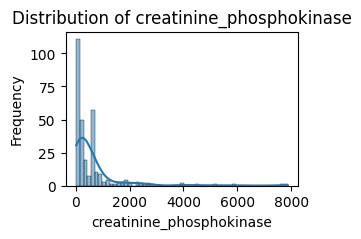

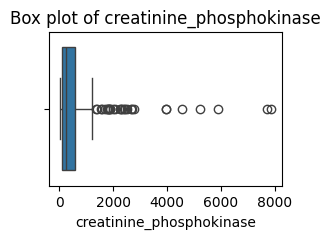

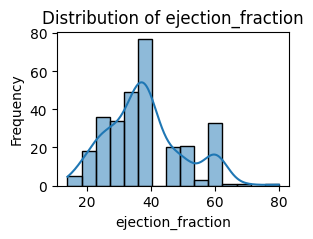

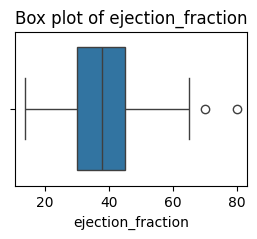

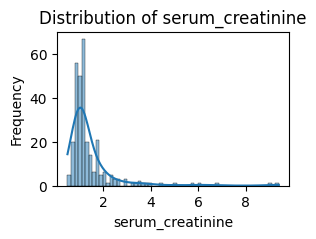

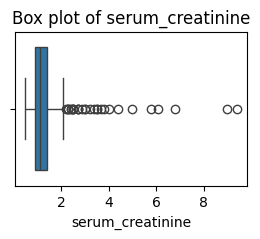

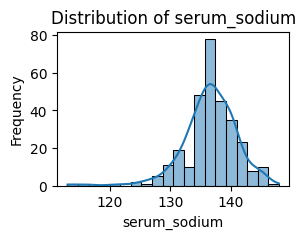

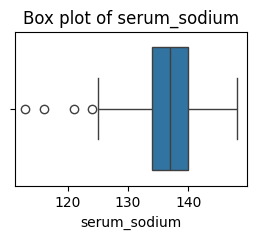

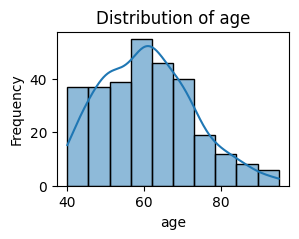

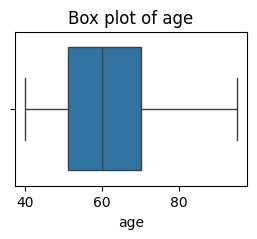

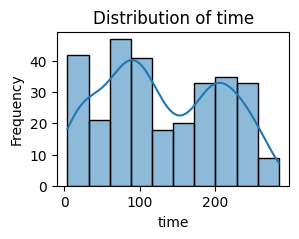

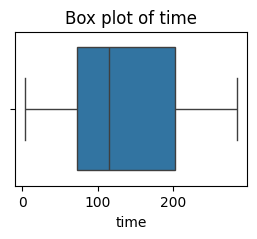

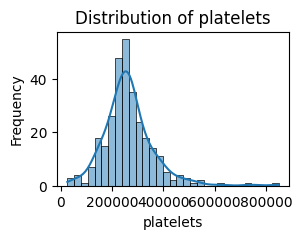

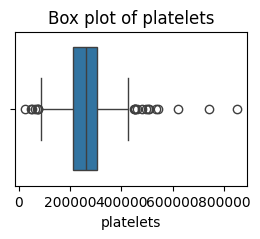

In [ ]:
# analyze numerical feature
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(3, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.show()

Values and their frequencies for anaemia:
anaemia
0    170
1    129
Name: count, dtype: int64



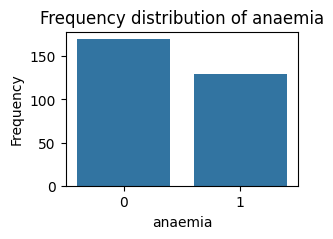

Values and their frequencies for high_blood_pressure:
high_blood_pressure
0    194
1    105
Name: count, dtype: int64



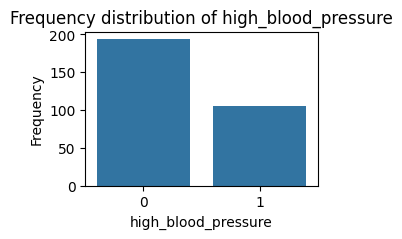

Values and their frequencies for diabetes:
diabetes
0    174
1    125
Name: count, dtype: int64



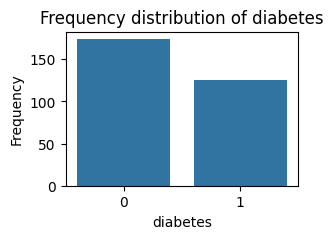

Values and their frequencies for sex:
sex
1    194
0    105
Name: count, dtype: int64



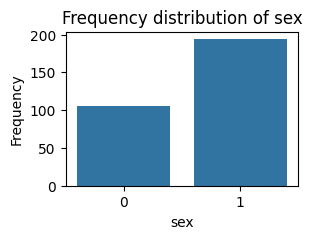

Values and their frequencies for smoking:
smoking
0    203
1     96
Name: count, dtype: int64



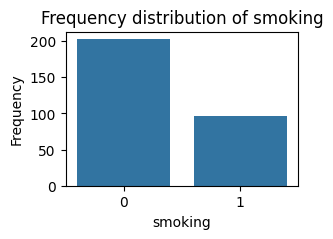

In [ ]:
for feature in categorical_cols:
    print(f"Values and their frequencies for {feature}:")
    print(df[feature].value_counts())
    print()

    # Frequency
    plt.figure(figsize=(3, 2))
    sns.countplot(x=feature, data=df)
    plt.title(f"Frequency distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

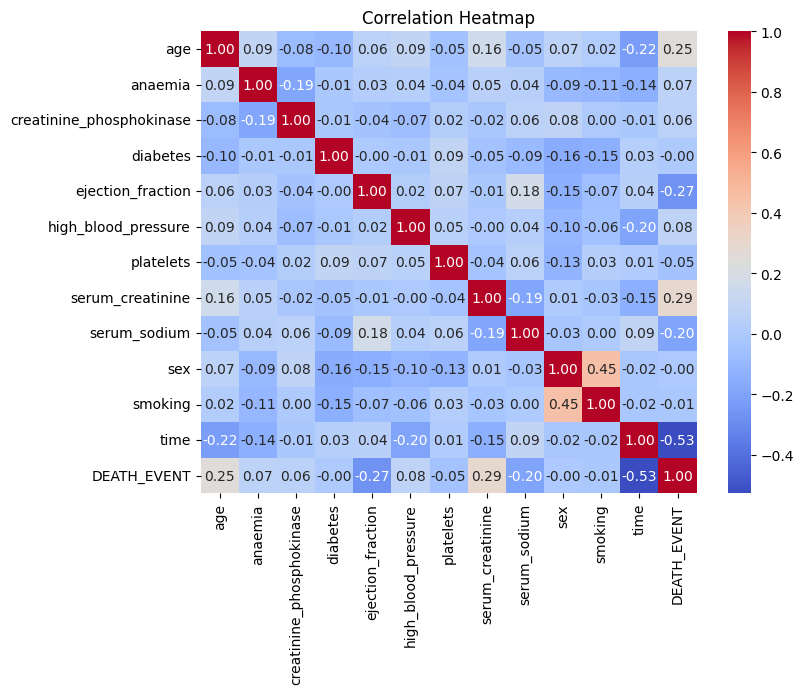

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. Missing values
- The dataset does not contain any missing values.
2. Outliers
- According to the box plot of the numerical features, there are outliers in those columns, which can be potential errors for the ML models. To address this, we should handle these outliers, usually by removing them using z-scores or based on IQR.

# 2. Clean & Split Data

In [ ]:
# Utilities
def remove_outliers_zscore(df, threshold=3):
    z_scores = (df - df.mean()) / df.std()
    df = df[(z_scores.abs() < threshold).all(axis=1)]

    return df

def remove_outliers_iqr(df, cols=None):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = ~((df[cols] < lower) | (df[cols] > upper)).any(axis=1)

    # Return the DataFrame with outliers removed
    return df[mask]

def split_dataset(df, target_column, test_size=0.3, random_state=42):
    df_copy = df.copy()

    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]

    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [ ]:
# load data
df = pd.read_csv(file_path)

# handle outliers
df = remove_outliers_zscore(df)

# splite dataset for classification task
X_cls_train, X_cls_test, y_cls_train, y_cls_test = split_dataset(df, cls_target)

# split dataset for regression task
X_reg_train, X_reg_test, y_reg_train, y_reg_test = split_dataset(df, reg_target)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


There are total 19 value have been eliminated after cleaning and spliting process.

# 3. Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_cls_train, y_cls_train)
y_pred = rf_classifier.predict(X_cls_test)
accuracy = accuracy_score(y_cls_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_cls_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_cls_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_cls_test, y_pred)
print("F1 Score:", f1)

Precision: 0.7894736842105263
Recall: 0.5555555555555556
F1 Score: 0.6521739130434783


# 4. Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_reg_train)
X_test_scaled = scaler.transform(X_reg_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_reg_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mae = mean_absolute_error(y_reg_test, lr_predictions)
lr_mse = mean_squared_error(y_reg_test, lr_predictions)
lr_r2 = r2_score(y_reg_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)


print("Linear Regression Metrics:")
print("Mean Absolute Error:", lr_mae)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R-squared Score:", lr_r2)



Linear Regression Metrics:
Mean Absolute Error: 61.06249874925338
Mean Squared Error: 4766.096820721937
Root Mean Squared Error (RMSE): 69.03692360412605
R-squared Score: 0.1996027817373015


In [1]:
%%shell
jupyter nbconvert --to html /content/Maybe_This_is_A_Final_Version_Heart_Failure_Model.ipynb

[NbConvertApp] Converting notebook /content/Maybe_This_is_A_Final_Version_Heart_Failure_Model.ipynb to html
[NbConvertApp] Writing 1157728 bytes to /content/Maybe_This_is_A_Final_Version_Heart_Failure_Model.html
